In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('input/Salary_Data.csv')
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [3]:
null_data = df.isnull().sum()
df.dropna(inplace=True)

In [4]:
df.info

<bound method DataFrame.info of        Age  Gender    Education Level              Job Title  \
0     32.0    Male         Bachelor's      Software Engineer   
1     28.0  Female           Master's           Data Analyst   
2     45.0    Male                PhD         Senior Manager   
3     36.0  Female         Bachelor's        Sales Associate   
4     52.0    Male           Master's               Director   
...    ...     ...                ...                    ...   
6699  49.0  Female                PhD  Director of Marketing   
6700  32.0    Male        High School        Sales Associate   
6701  30.0  Female  Bachelor's Degree      Financial Manager   
6702  46.0    Male    Master's Degree      Marketing Manager   
6703  26.0  Female        High School        Sales Executive   

      Years of Experience    Salary  
0                     5.0   90000.0  
1                     3.0   65000.0  
2                    15.0  150000.0  
3                     7.0   60000.0  
4        

In [5]:
df['Education Level'].value_counts()

Education Level
Bachelor's Degree    2265
Master's Degree      1572
PhD                  1368
Bachelor's            756
High School           448
Master's              288
phD                     1
Name: count, dtype: int64

In [6]:
def UnifyEducationLevel(s):
    for e in ['Bachelor', 'Master', 'PhD']:
        if e.lower() in s.lower(): return e
    return s


df['Education Level'] = df['Education Level'].apply(UnifyEducationLevel)
df['Education Level'].value_counts()

Education Level
Bachelor       3021
Master         1860
PhD            1369
High School     448
Name: count, dtype: int64

In [7]:
df.duplicated().sum()

4912

In [8]:
df.pivot_table(index=['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience', 'Salary'], aggfunc='size').sort_values().tail(10)

Age   Gender  Education Level  Job Title          Years of Experience  Salary  
29.0  Male    Bachelor         Marketing Analyst  4.0                  70000.0     33
26.0  Male    Bachelor         Data Analyst       3.0                  130000.0    35
25.0  Male    Bachelor         Product Manager    1.0                  60000.0     36
27.0  Male    Bachelor         Software Engineer  4.0                  140000.0    37
29.0  Female  Master           Data Scientist     6.0                  180000.0    37
33.0  Female  Master           Product Manager    11.0                 198000.0    38
32.0  Male    Bachelor         Software Engineer  8.0                  190000.0    39
27.0  Male    Bachelor         Software Engineer  3.0                  80000.0     45
24.0  Female  High School      Receptionist       0.0                  25000.0     45
32.0  Male    Bachelor         Product Manager    7.0                  120000.0    45
dtype: int64

In [9]:
df.to_csv('input/salary_data_cleaned.csv', index=False)

In [10]:

mean_salary = df['Salary'].mean()
median_salary = df['Salary'].median()
mode_salary = df['Salary'].mode()[0]

std_dev_salary = df['Salary'].std()

quantiles_salary = df['Salary'].quantile([0.25, 0.50, 0.75])
print(f'Średnia pensja: {mean_salary:.2f}'
      f'\nMediana pensji: {median_salary:.2f}'
      f'\nDominanta pensji: {mode_salary:.2f}'
      f'\nOdchylenie standardowe pensji: {std_dev_salary:.2f}'
      f'\nKwartyle pensji (25%, 50%, 75%):\n{quantiles_salary}')

Średnia pensja: 115329.25
Mediana pensji: 115000.00
Dominanta pensji: 140000.00
Odchylenie standardowe pensji: 52789.79
Kwartyle pensji (25%, 50%, 75%):
0.25     70000.0
0.50    115000.0
0.75    160000.0
Name: Salary, dtype: float64


In [11]:
skewness_salary = df['Salary'].skew()
kurtosis_salary = df['Salary'].kurt()

print(f'Współczynnik asymetrii (skewness): {skewness_salary:.3f}')
print(f'Współczynnik kurtozy: {kurtosis_salary:.3f}')

Współczynnik asymetrii (skewness): 0.057
Współczynnik kurtozy: -1.167


In [12]:
correlation_matrix = df[['Salary', 'Age', 'Years of Experience']].corr()
correlation_matrix

,Salary,Age,Years of Experience
Salary,1.000000,0.728061,0.808968
Age,0.728061,1.000000,0.937725
Years of Experience,0.808968,0.937725,1.000000


In [13]:
df['Gender Num'] = df['Gender'].map({'Male': 1, 'Female': 0})

# Calculate correlation matrix including 'Gender'
extended_correlation_matrix = df[['Salary', 'Age', 'Years of Experience', 'Gender Num']].corr()

extended_correlation_matrix

,Salary,Age,Years of Experience,Gender Num
Salary,1.000000,0.728061,0.808968,0.127276
Age,0.728061,1.000000,0.937725,0.117401
Years of Experience,0.808968,0.937725,1.000000,0.098809
Gender Num,0.127276,0.117401,0.098809,1.000000


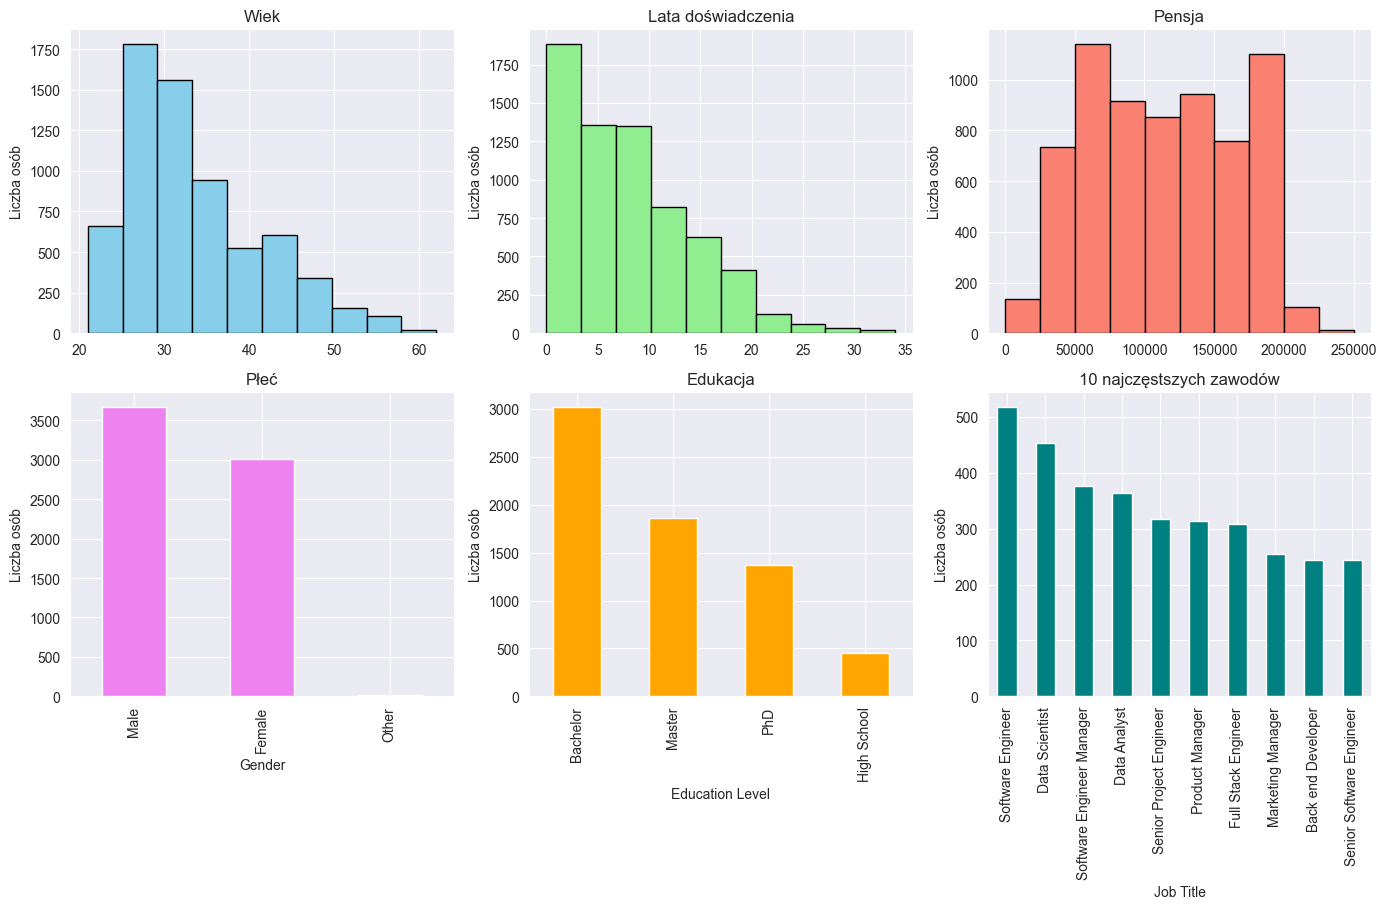

In [14]:
df['Age'] = df['Age'].astype(int)
df['Years of Experience'] = df['Years of Experience'].astype(int)

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(14, 10))

df['Age'].plot(kind='hist', ax=axes[0, 0], title='Wiek', color='skyblue', edgecolor='black')
axes[0, 0].set_ylabel('Liczba osób')

df['Years of Experience'].plot(kind='hist', ax=axes[0, 1], title='Lata doświadczenia', color='lightgreen', edgecolor='black')
axes[0, 1].set_ylabel('Liczba osób')

df['Salary'].plot(kind='hist', ax=axes[0, 2], title='Pensja', color='salmon', edgecolor='black')
axes[0, 2].set_ylabel('Liczba osób')

df['Gender'].value_counts().plot(kind='bar', ax=axes[1, 0], title='Płeć', color='violet', ylabel='Liczba osób')

df['Education Level'].value_counts().plot(kind='bar', ax=axes[1, 1], title='Edukacja', color='orange', ylabel='Liczba osób')

df['Job Title'].value_counts()[:10].plot(kind='bar', ax=axes[1, 2].tick_params(axis='x', rotation=90), title='10 najczęstszych zawodów', ylabel='Liczba osób', color='teal')

fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('output/distribution_plots.png')
plt.show()

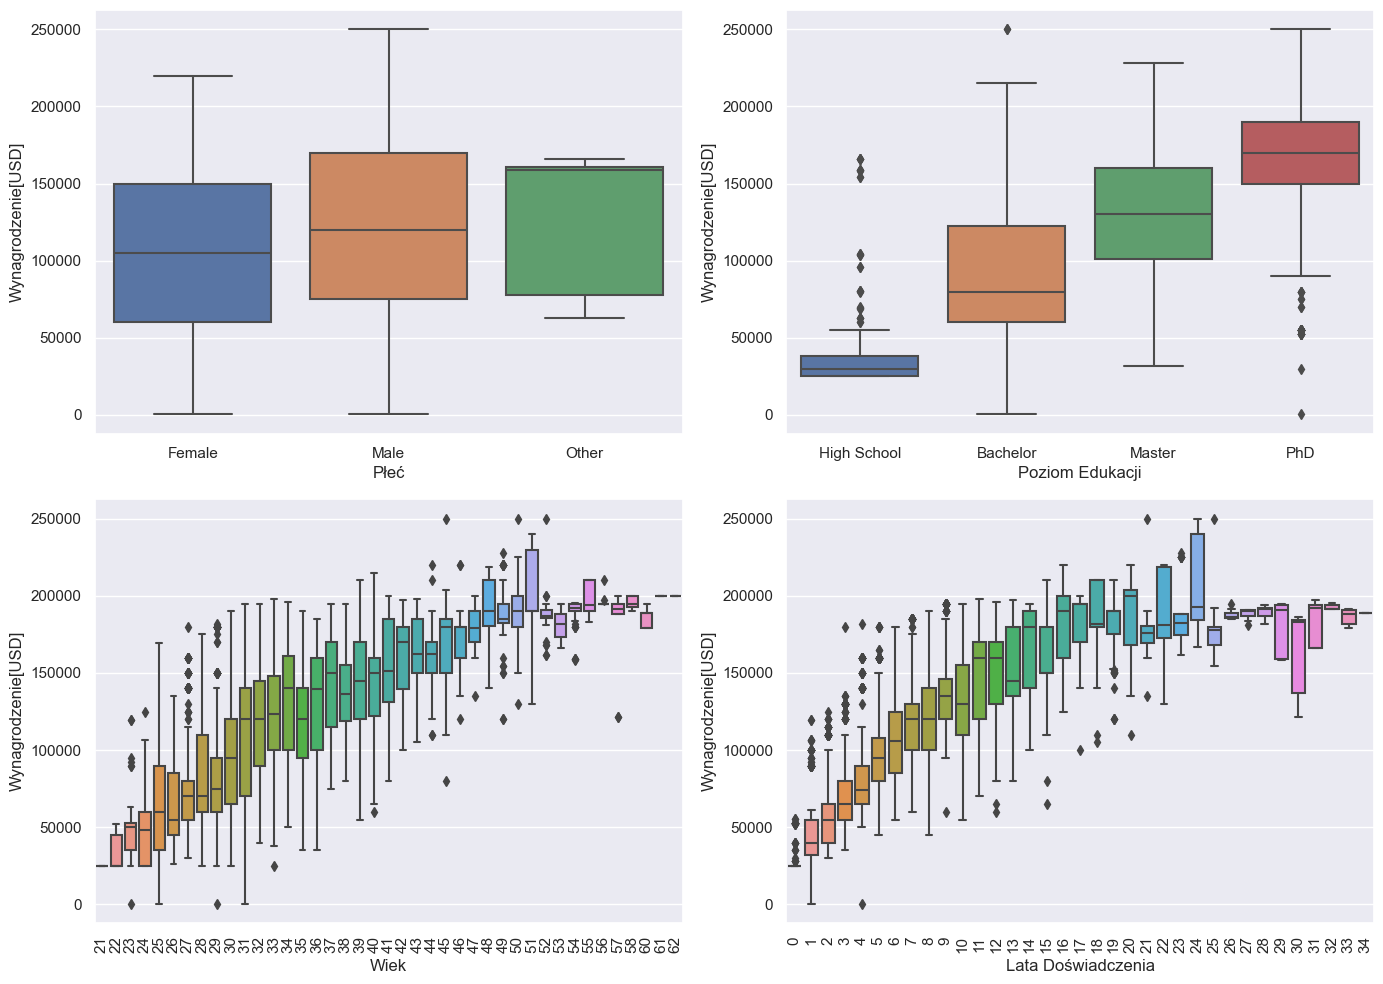

In [21]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

xfactor = "Gender"
g = sns.boxplot(x=xfactor, y="Salary", data=df, ax=axes[0, 0], order=df.groupby(xfactor)['Salary'].median().sort_values().index)
g.set(ylabel='Wynagrodzenie[USD]', xlabel='Płeć')

xfactor = "Education Level"
g = sns.boxplot(x=xfactor, y="Salary", data=df, ax=axes[0, 1], order=df.groupby(xfactor)['Salary'].median().sort_values().index)
g.set(ylabel='Wynagrodzenie[USD]', xlabel='Poziom Edukacji')

xfactor = "Age"
g = sns.boxplot(x=xfactor, y="Salary", ax=axes[1, 0], data=df)
g.set(ylabel='Wynagrodzenie[USD]', xlabel='Wiek')
g.tick_params(axis='x', rotation=90)

xfactor = "Years of Experience"
g = sns.boxplot(x=xfactor, y="Salary", ax=axes[1, 1], data=df)
g.set(ylabel='Wynagrodzenie[USD]', xlabel='Lata Doświadczenia')
g.tick_params(axis='x', rotation=90)
plt.tight_layout()
plt.savefig('output/salary_factors.png')

plt.show()

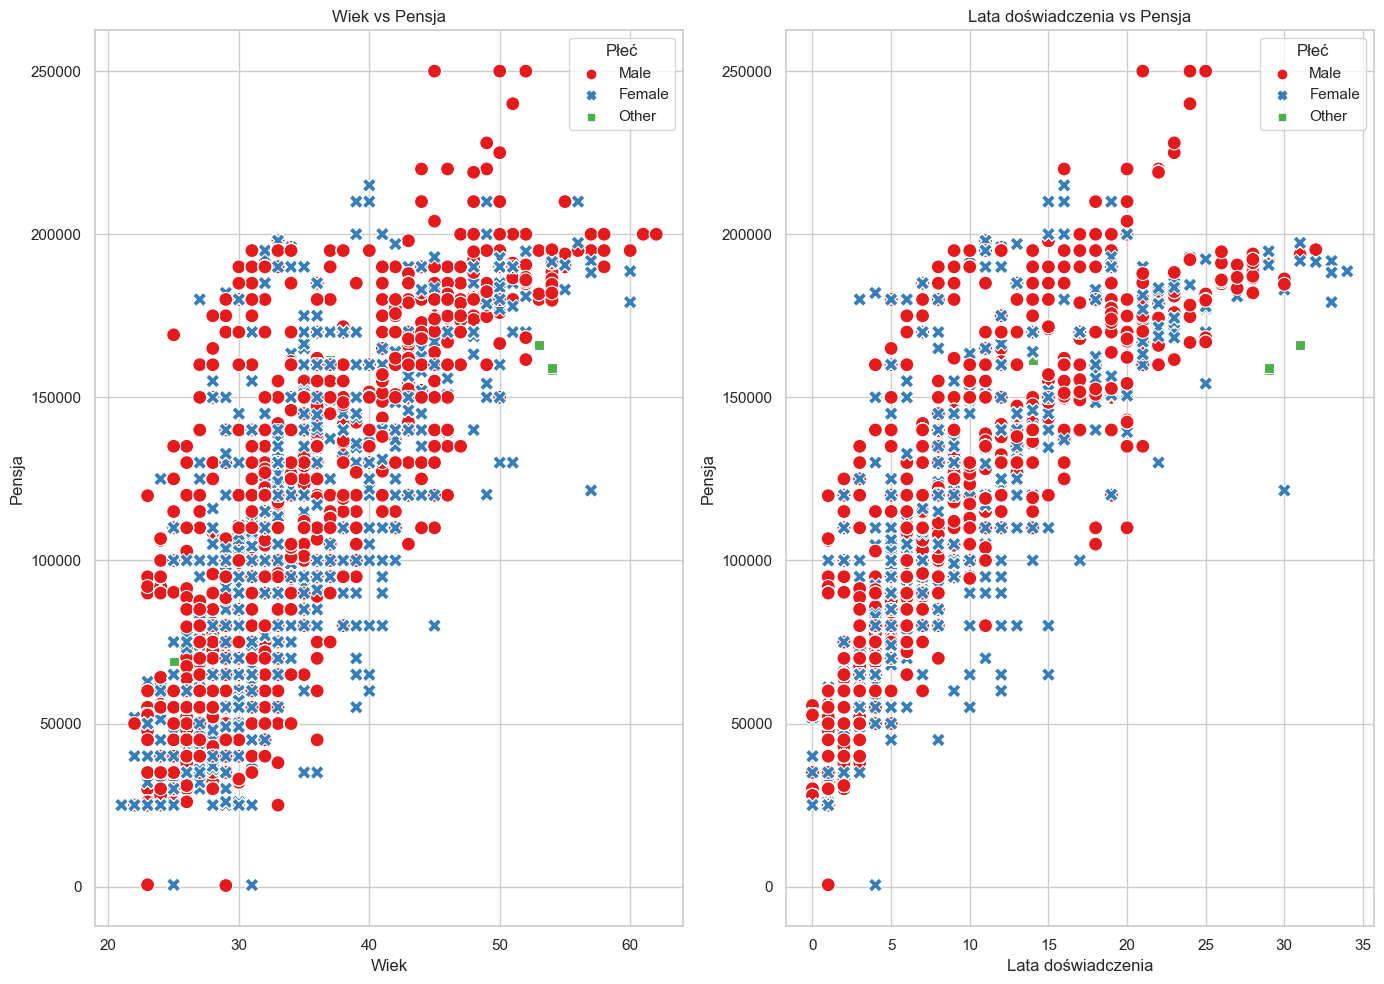

In [20]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(1, 2, figsize=(14, 10))

sns.scatterplot(ax=axes[0], x='Age', y='Salary', hue='Gender', data=df, palette='Set1', style='Gender', s=100)
axes[0].set_title('Wiek vs Pensja')
axes[0].set_xlabel('Wiek')
axes[0].set_ylabel('Pensja')
axes[0].legend(title='Płeć')

sns.scatterplot(ax=axes[1], x='Years of Experience', y='Salary', hue='Gender', data=df, palette='Set1', style='Gender', s=100)
axes[1].set_title('Lata doświadczenia vs Pensja')
axes[1].set_xlabel('Lata doświadczenia')
axes[1].set_ylabel('Pensja')
axes[1].legend(title='Płeć')

plt.tight_layout()
plt.savefig('output/salary_scatter_plots.png')
plt.show()

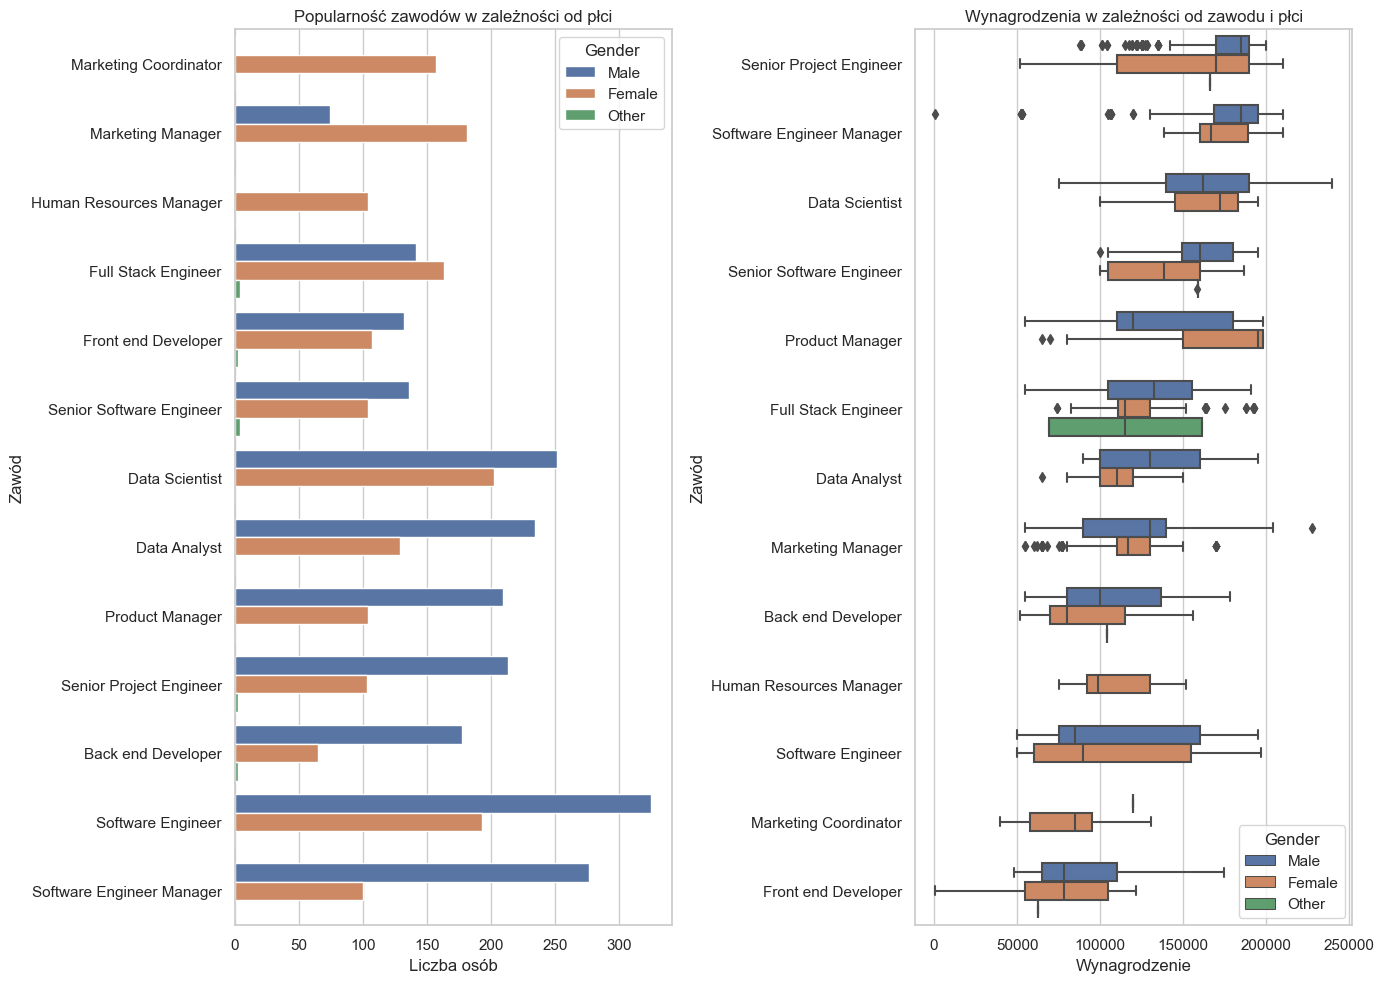

In [19]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 10))

male_pop_jobs = df[df['Gender'] == 'Male']['Job Title'].value_counts()[:10].index
female_pop_jobs = df[df['Gender'] == 'Female']['Job Title'].value_counts()[:10].index
top_jobs = set(list(male_pop_jobs) + list(female_pop_jobs))

job_count_diff = []
for job in top_jobs:
    job_data = df[df['Job Title'] == job]
    diff_count = job_data[job_data['Gender'] == 'Male'].shape[0] - job_data[job_data['Gender'] == 'Female'].shape[0]
    job_count_diff.append([job, diff_count])
job_count_diff.sort(key=lambda x: x[1])

both_pop_jobs_data = df[df['Job Title'].isin(top_jobs)]
g = sns.countplot(y='Job Title', hue='Gender', data=both_pop_jobs_data, order=[job[0] for job in job_count_diff], ax=axes[0])
g.set(title='Popularność zawodów w zależności od płci', ylabel='Zawód', xlabel='Liczba osób')

high_pay_jobs = both_pop_jobs_data.groupby('Job Title')['Salary'].median().sort_values(ascending=False).index
sns.boxplot(y="Job Title", x="Salary", data=both_pop_jobs_data, order=high_pay_jobs, hue='Gender', ax=axes[1])
axes[1].set_title('Wynagrodzenia w zależności od zawodu i płci')
axes[1].set_xlabel('Wynagrodzenie')
axes[1].set_ylabel('Zawód')

plt.tight_layout()
plt.savefig('output/job.png')
plt.show()